In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read each comments folder from the youtube folder path
path = 'datasets/youtube/'
# Creating key, values for each event
files = {
   'qatar_world_cup.csv': {'event': 'World Cup', 'year': 2022},
   'russia_world_cup.csv': {'event': 'World Cup', 'year': 2018},
   'paris_olympics.csv': {'event': 'Olympics', 'year': 2024},
   'tokyo_olympics.csv': {'event': 'Olympics', 'year': 2021} 
}

dfs = []
for file, meta in files.items():
    df = pd.read_csv(path + file)
    df['event'] = meta['event']
    df['year'] = meta['year']
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
print("Combined shape:", df.shape)
df.head()

Combined shape: (39996, 9)


,id,parent_id,text,author,views,likes,datetime,event,year
0,3VoaJdO6wDo,NaN,2022 FIFA World Cup nostalgia…,UCpcTrCXblq78GZrTUTLWeBw,420257.0,25492.0,2024-11-20 14:30:02,World Cup,2022
1,UgyGsqZsjWIv8xxwACh4AaABAg,3VoaJdO6wDo,Event in FIFA😢,@user-uhsk,NaN,0.0,2025-05-22 06:09:59,World Cup,2022
2,UgwL9czkoPjVzWr7X2R4AaABAg,3VoaJdO6wDo,2026 world cup hayya hayya song please 😢 is so...,@semuaorangberkata3031,NaN,0.0,2025-05-21 07:53:28,World Cup,2022
3,Ugw97iR1DZPLlnFoli94AaABAg,3VoaJdO6wDo,What I miss most about 2022 was the best World...,@Leandrin_BR,NaN,1.0,2025-05-20 16:46:52,World Cup,2022
4,UgyZD301zagqhX5khph4AaABAg,3VoaJdO6wDo,Watching the World Cub ❤كأس العالم,@حمودالحربي-و7ش,NaN,0.0,2025-05-20 04:07:35,World Cup,2022


In [18]:
# Save dataset before cleaning if needed later
df_combined = df.copy() 
df_combined.to_csv('datasets/youtube_combined.csv', index=False)
print("Combined raw dataset saved to: datasets/youtube_combined.csv")

Combined raw dataset saved to: datasets/youtube_combined.csv


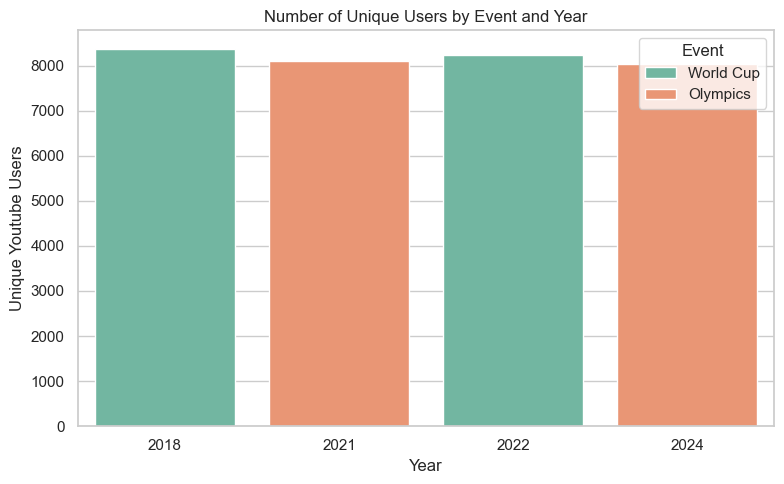

In [20]:
# Unique users 
sns.set(style='whitegrid')
user_count = df.groupby(['event', 'year'])['author'].nunique().reset_index()
user_count.columns = ['Event', 'year', 'unique_users']

plt.figure(figsize=(8, 5))
sns.barplot(data=user_count, x='year', y='unique_users', hue='Event', palette='Set2')
plt.title("Number of Unique Users by Event and Year")
plt.xlabel("Year")
plt.ylabel("Unique Youtube Users")
plt.tight_layout()
plt.show()

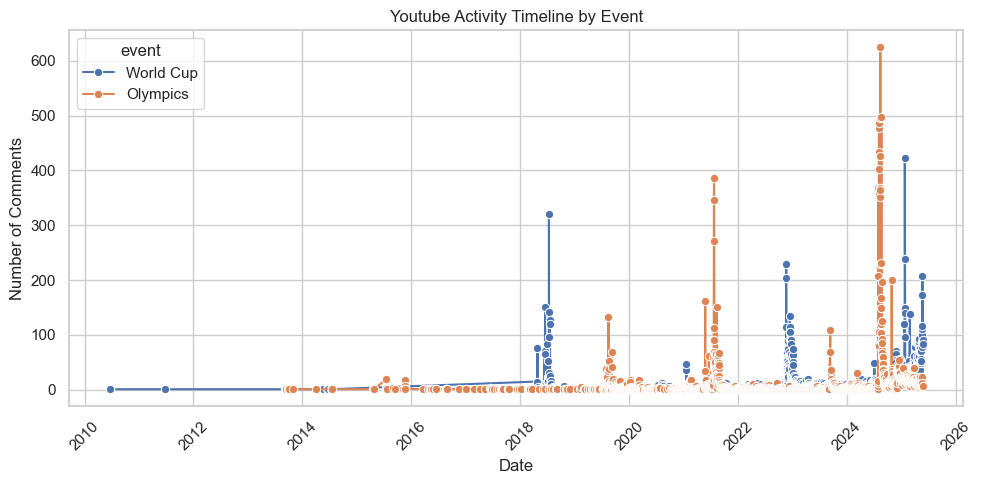

In [22]:
# Activity Timeline by Event
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')
df['date'] = df['datetime'].dt.date

activity_by_date = df.groupby(['date', 'event']).size().reset_index(name='count')
plt.figure(figsize=(10, 5))
sns.lineplot(data=activity_by_date, x='date', y='count', hue='event', marker='o')
plt.title("Youtube Activity Timeline by Event")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
import re
nltk.download('wordnet')
nltk.download('omw-1.4')

stop_words = set(stopwords.words('english'))
tokenizer = TweetTokenizer()
lemmatizer = WordNetLemmatizer()

# Cleaning function
def clean_text(text):
    if not isinstance(text, str):
        return ''
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", '', text)  
    text = re.sub(r"[^a-zA-Z\s]", '', text)    
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words and len(t) > 2]
    return ' '.join(tokens)

# Apply to dataset
df['clean_text'] = df['text'].apply(clean_text)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/harrietmathew/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/harrietmathew/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [26]:
df[['text', 'clean_text']].sample(5)

,text,clean_text
35562,"@Super Abr Bros \nnahh , republic TV is 🤢🤮,i p...",super abr bros nahh republic prefer wionrepubl...
18497,Jesus Christ loves YOU\ndied for YOU\nand will...,jesus christ love died give peace world cannot
14306,Morocco*,morocco
24945,This host is fun to listening to.,host fun listening
36483,When a TV channel does a proper job - Channel ...,channel proper job channel take bow


In [28]:
# Save full DataFrame with cleaned text and metadata
df.to_csv('datasets/youtube_cleaned.csv', index=False)
print("Preprocessed dataset saved to: datasets/youtube_cleaned.csv")

Preprocessed dataset saved to: datasets/youtube_cleaned.csv
